In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import seaborn as sns # I love this package!
#sns.set_style('white')

import torch

### Loss Trend Check

In [2]:
total_sizes = [500, 1000, 2000, 5000, 10000]
sizes = {}
sizes[500] = [100, 200, 300, 400]
sizes[1000] = [200, 400, 600, 800, 900]
sizes[2000] = [500, 1000, 1500, 1900]
sizes[5000] = [3500, 4000, 4500, 4900]
sizes[10000] = [8500, 9000, 9500, 9900]

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred, s, added):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for start_labels {s} and Added {added} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(s = str(s), added = str(added), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

-------------------------------------
Showing losses for size = 500
num_samples_start = 100
num_samples_added = 4
Min_Loss = 0.7883966565132141
Epoch of Best Model = 122


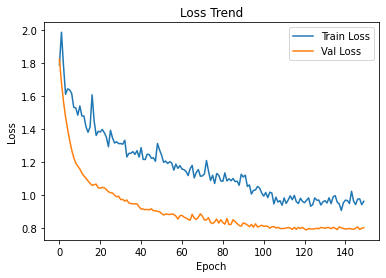

num_samples_start = 200
num_samples_added = 3
Min_Loss = 0.7476722002029419
Epoch of Best Model = 100


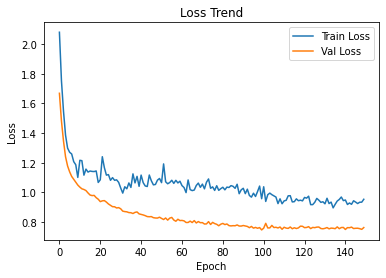

num_samples_start = 300
num_samples_added = 2
Min_Loss = 0.7564566135406494
Epoch of Best Model = 124


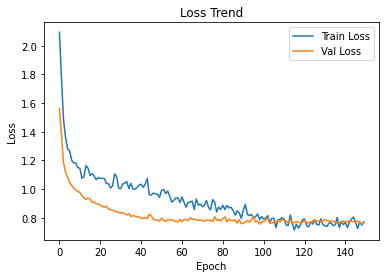

num_samples_start = 400
num_samples_added = 1
Min_Loss = 0.730918824672699
Epoch of Best Model = 100


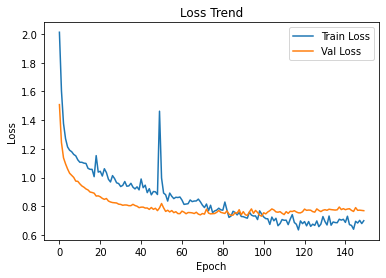

-------------------------------------
Showing losses for size = 1000
num_samples_start = 200
num_samples_added = 8
Min_Loss = 0.689201295375824
Epoch of Best Model = 130


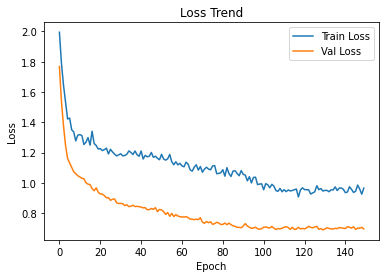

num_samples_start = 400
num_samples_added = 6
Min_Loss = 0.6855018138885498
Epoch of Best Model = 108


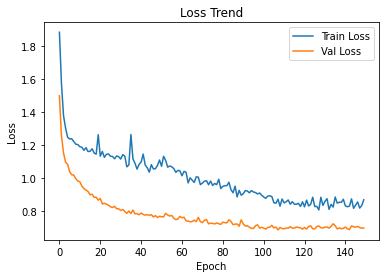

num_samples_start = 600
num_samples_added = 4
Min_Loss = 0.6743785738945007
Epoch of Best Model = 121


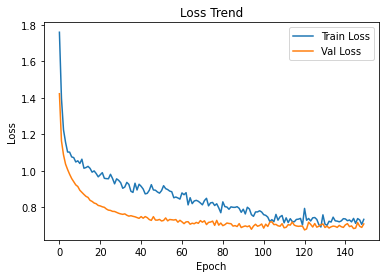

num_samples_start = 800
num_samples_added = 2
Min_Loss = 0.6910666823387146
Epoch of Best Model = 61


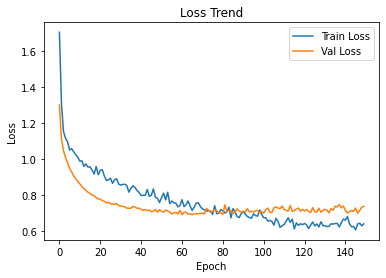

num_samples_start = 900
num_samples_added = 1
Min_Loss = 0.6816855072975159
Epoch of Best Model = 66


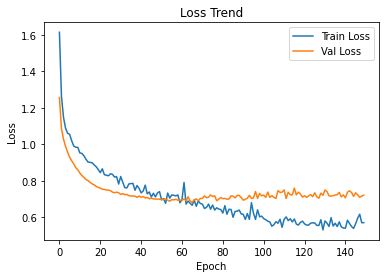

-------------------------------------
Showing losses for size = 2000
num_samples_start = 500
num_samples_added = 15
Min_Loss = 0.6409432291984558
Epoch of Best Model = 102


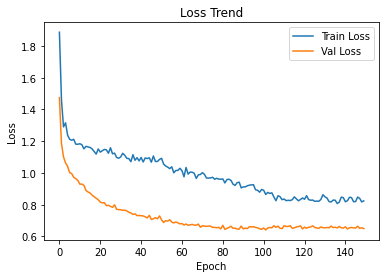

num_samples_start = 1000
num_samples_added = 10
Min_Loss = 0.624673068523407
Epoch of Best Model = 147


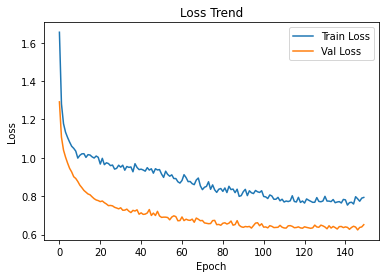

num_samples_start = 1500
num_samples_added = 5
Min_Loss = 0.6287786960601807
Epoch of Best Model = 106


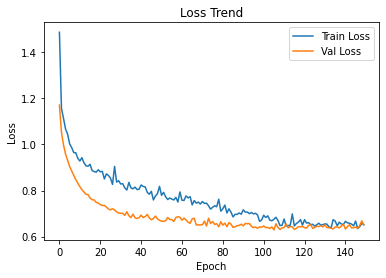

num_samples_start = 1900
num_samples_added = 1
Min_Loss = 0.6409690976142883
Epoch of Best Model = 74


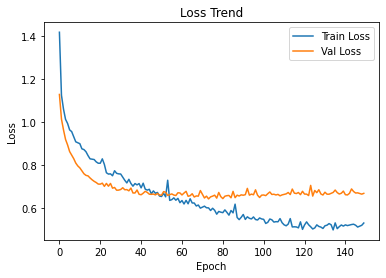

-------------------------------------
Showing losses for size = 5000
num_samples_start = 3500
num_samples_added = 15
Min_Loss = 0.580501139163971
Epoch of Best Model = 136


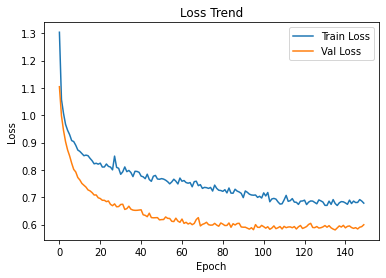

num_samples_start = 4000
num_samples_added = 10
Min_Loss = 0.5804811120033264
Epoch of Best Model = 122


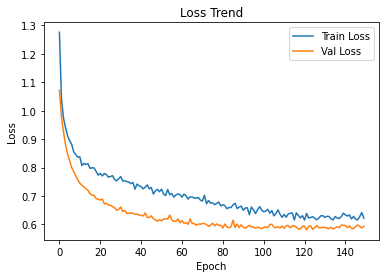

num_samples_start = 4500
num_samples_added = 5
Min_Loss = 1.0539947748184204
Epoch of Best Model = 1


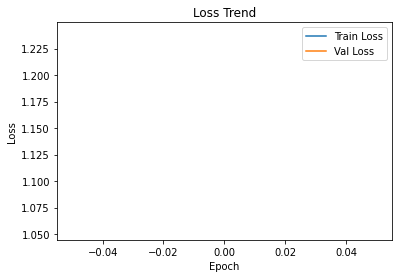

num_samples_start = 4900
num_samples_added = 1
Min_Loss = 0.5882901549339294
Epoch of Best Model = 83


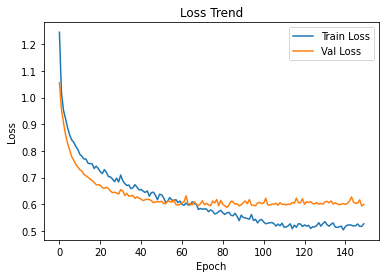

-------------------------------------
Showing losses for size = 10000
num_samples_start = 8500
num_samples_added = 15
Min_Loss = 0.5528894066810608
Epoch of Best Model = 76


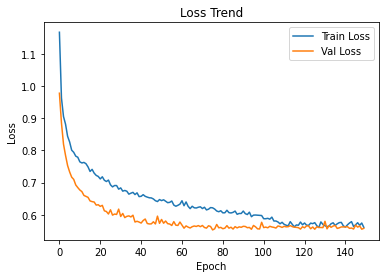

num_samples_start = 9000
num_samples_added = 10
Min_Loss = 0.5559155941009521
Epoch of Best Model = 80


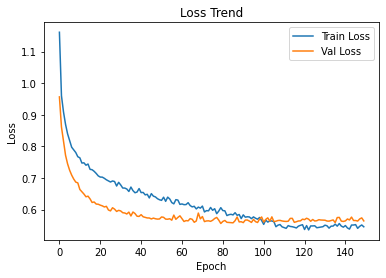

num_samples_start = 9500
num_samples_added = 5
Min_Loss = 0.5537843108177185
Epoch of Best Model = 94


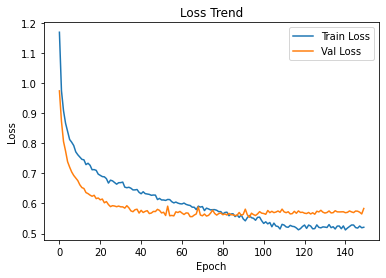

num_samples_start = 9900
num_samples_added = 1
Min_Loss = 0.5592526197433472
Epoch of Best Model = 82


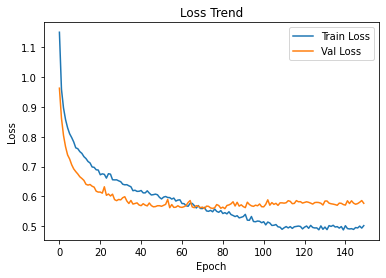

In [4]:
# load check point
for size in sizes:
    print('-------------------------------------')
    print('Showing losses for size = ' + str(size))
    for s in sizes[size]:
        added = int((size - s) / 100.0)
        print('num_samples_start = ' + str(s))
        print("num_samples_added = " + str(added))
        model_path = f'checkpoint_{s}_{added}.pth.tar'
        checkpoint = torch.load(model_path)
        loss_history_train = checkpoint['loss_history_train']
        loss_history_val = checkpoint['loss_history_val']
        #loss_train = [np.mean(l) for l in loss_history_train]
        loss_train = [float(torch.mean(torch.stack(l))) for l in loss_history_train]
        #loss_val = [np.mean(l) for l in loss_history_val]
        loss_val = [float(torch.mean(torch.stack(l))) for l in loss_history_val]
        print("Min_Loss = " + str(min(loss_val)))
        print("Epoch of Best Model = " + str(np.argmin(loss_val) + 1))

        plt.plot(loss_train, label = 'Train Loss')
        plt.plot(loss_val, label = 'Val Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Trend')
        plt.legend()
        plt.show()

In [5]:
aucs = {}
accs = {}

for size in sizes:
    aucs[size] = []
    accs[size] = []




-------------------------------------
Showing acc/auc for size = 500
*** loading model from modelbest_100_4.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:39, 205.31it/s]                                                      


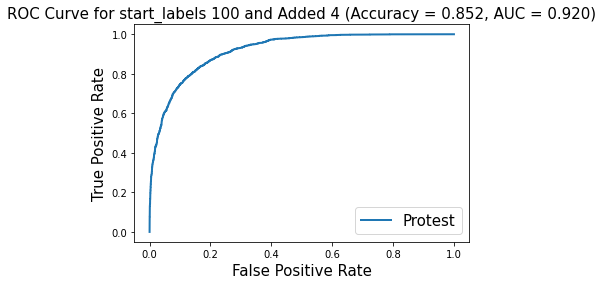

*** loading model from modelbest_200_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 332.56it/s]                                                      


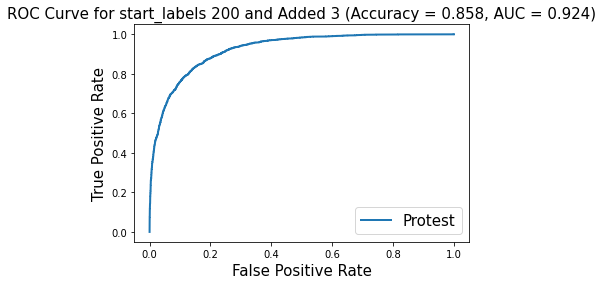

*** loading model from modelbest_300_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 328.70it/s]                                                      


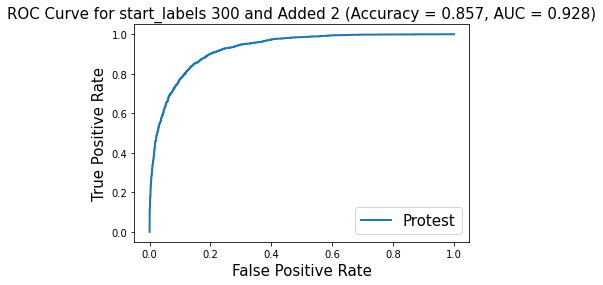

*** loading model from modelbest_400_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 329.31it/s]                                                      


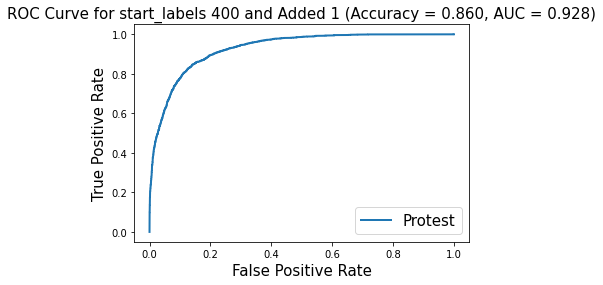

-------------------------------------
Showing acc/auc for size = 1000
*** loading model from modelbest_200_8.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 330.89it/s]                                                      


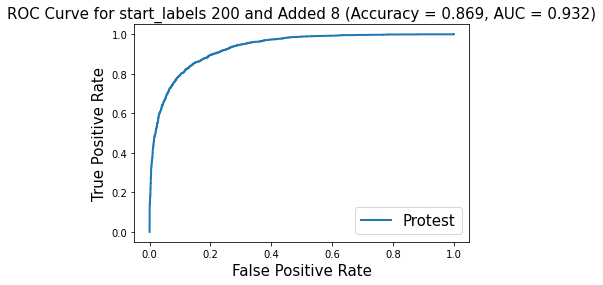

*** loading model from modelbest_400_6.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 327.09it/s]                                                      


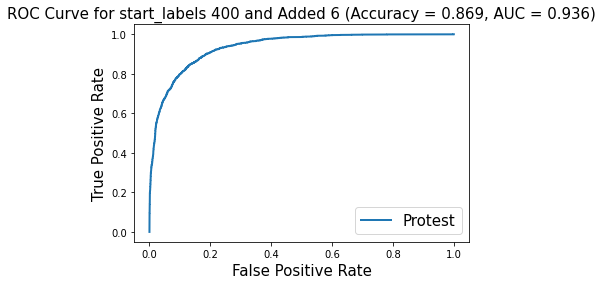

*** loading model from modelbest_600_4.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 327.21it/s]                                                      


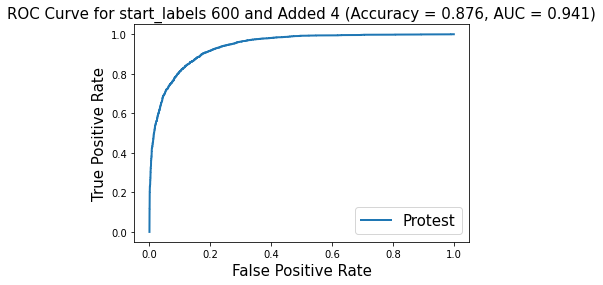

*** loading model from modelbest_800_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 330.97it/s]                                                      


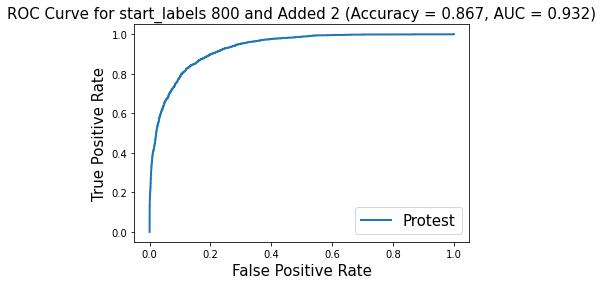

*** loading model from modelbest_900_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 328.67it/s]                                                      


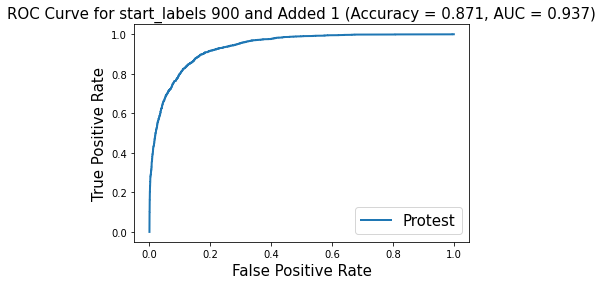

-------------------------------------
Showing acc/auc for size = 2000
*** loading model from modelbest_500_15.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 329.98it/s]                                                      


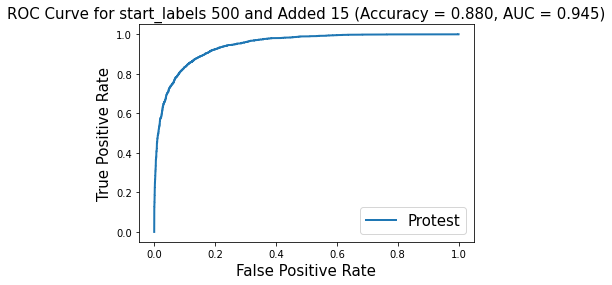

*** loading model from modelbest_1000_10.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 326.71it/s]                                                      


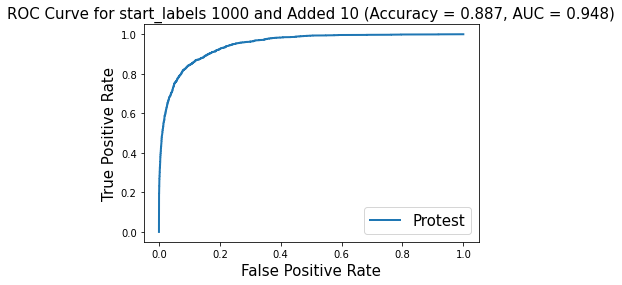

*** loading model from modelbest_1500_5.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 327.82it/s]                                                      


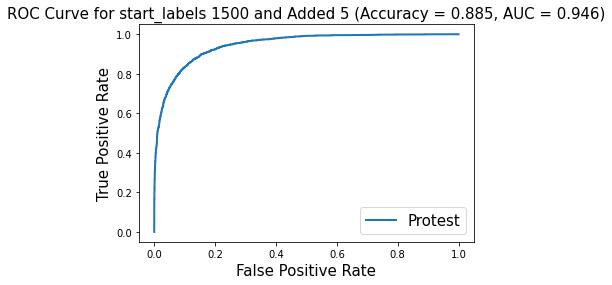

*** loading model from modelbest_1900_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 329.44it/s]                                                      


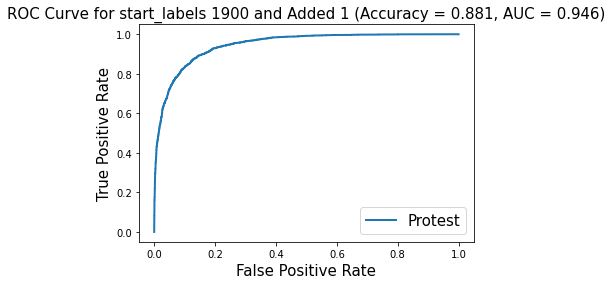

-------------------------------------
Showing acc/auc for size = 5000
*** loading model from modelbest_3500_15.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 327.03it/s]                                                      


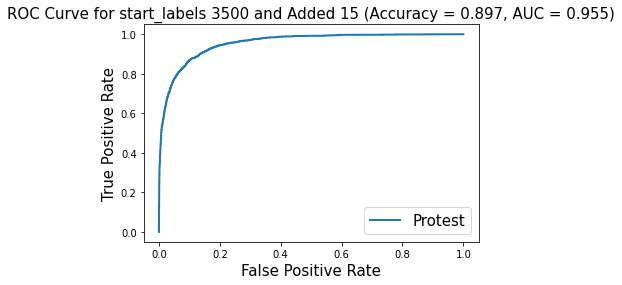

*** loading model from modelbest_4000_10.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 326.95it/s]                                                      


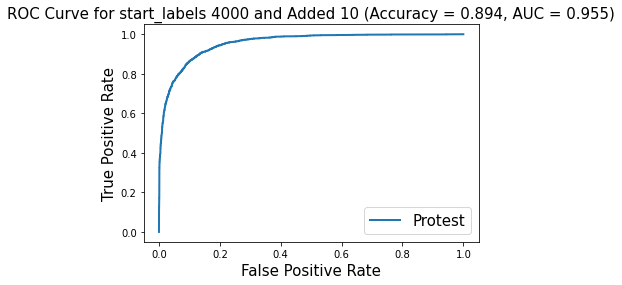

*** loading model from modelbest_4500_5.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 329.28it/s]                                                      


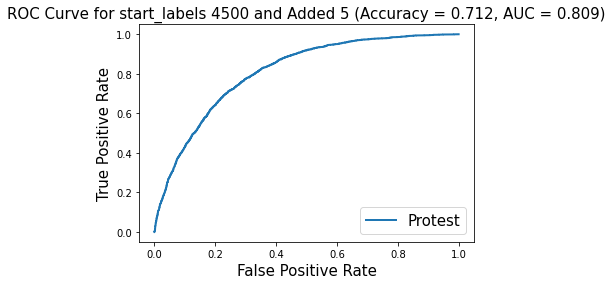

*** loading model from modelbest_4900_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 331.38it/s]                                                      


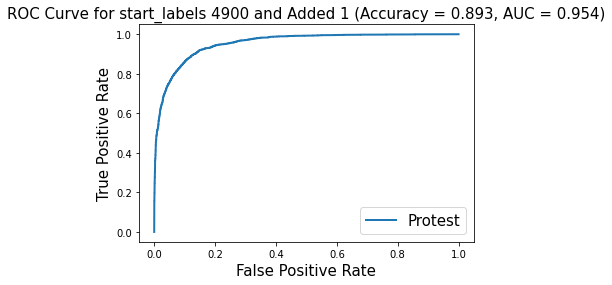

-------------------------------------
Showing acc/auc for size = 10000
*** loading model from modelbest_8500_15.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 331.94it/s]                                                      


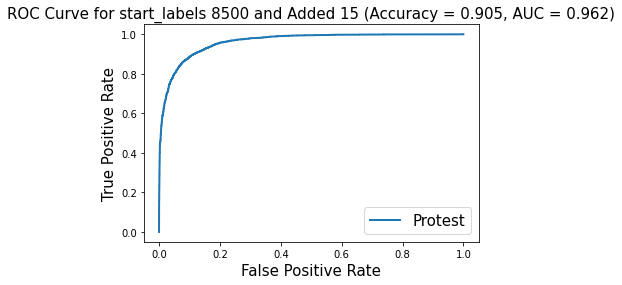

*** loading model from modelbest_9000_10.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 332.69it/s]                                                      


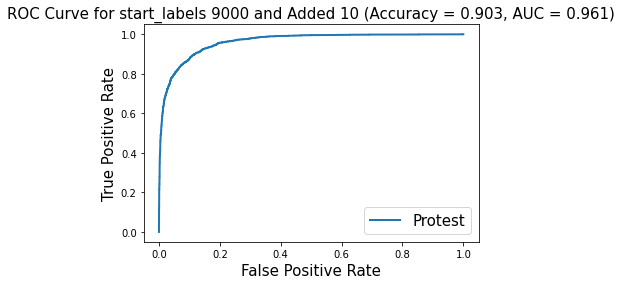

*** loading model from modelbest_9500_5.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:25, 324.17it/s]                                                      


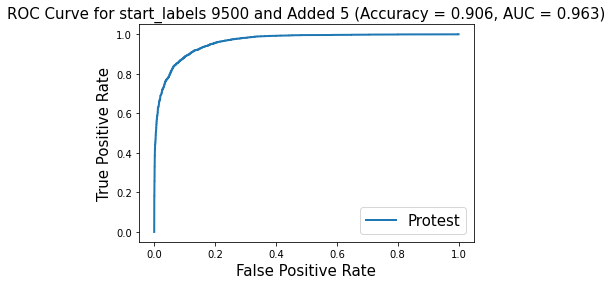

*** loading model from modelbest_9900_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 328.84it/s]                                                      


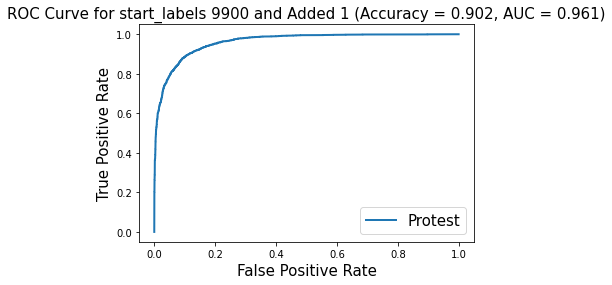

In [6]:
for size in sizes:
    print('-------------------------------------')
    print('Showing acc/auc for size = ' + str(size))
    for s in sizes[size]:
        added = int((size - s) / 100.0)
        model_path = f'modelbest_{s}_{added}.pth.tar'
        # calculate outputs for the test data with our best model
        output_csv_path = 'pred.csv'
        command = ('python pred.py '
                   '--img_dir /UCLA-protest/img/test/ '
                   '--output_csvpath {csv_path} '
                   '--model {model} --batch_size 4 --cuda'
                   .format(csv_path = output_csv_path, model = model_path))


        !{command}

        # load prediction
        df_pred = pd.read_csv(output_csv_path)
        df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

        # load target
        test_label_path = '/UCLA-protest/annot_test.txt'
        df_target = pd.read_csv(test_label_path, delimiter= '\t')
        attr = "protest"
        target = df_target[attr]
        pred = df_pred[attr]
        fig = plot_roc(attr, target, pred, s, added)
        auc = roc_auc_score(target, pred)
        acc = accuracy_score(target, (pred >= 0.5).astype(int))
        aucs[size].append(auc)
        accs[size].append(acc)

In [7]:
best_aucs = [0.904760]
best_accs = [0.837606]
best_starting_size_auc = [100]
best_starting_size_acc = [100]
for size in sizes:
    best_aucs.append(max(aucs[size]))
    best_starting_size_auc.append(sizes[size][np.argmax(aucs[size])])
    best_accs.append(max(accs[size]))
    best_starting_size_acc.append(sizes[size][np.argmax(accs[size])])

In [8]:
print(best_starting_size_auc)
print(best_starting_size_acc)

[100, 300, 600, 1000, 4000, 9500]
[100, 400, 600, 1000, 3500, 9500]


In [9]:
worst_aucs = [0.911249]
worst_accs = [0.844842]
for size in sizes:
    worst_aucs.append(min(aucs[size]))
    worst_accs.append(min(accs[size]))

In [10]:
learning_curve_aucs = [0.896791, 0.917798, 0.933183, 0.944396, 0.954834, 0.962044]
learning_curve_accs = [0.832822, 0.851220, 0.872317, 0.883969, 0.894395, 0.906047]

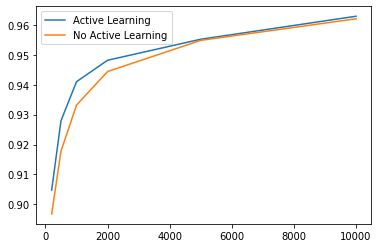

In [11]:
plt.plot([200]+list(sizes.keys()), best_aucs, label='Active Learning')
plt.plot([200]+list(sizes.keys()), learning_curve_aucs, label = 'No Active Learning')
plt.legend()
plt.show()

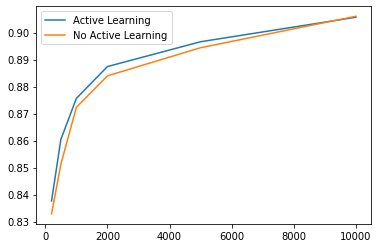

In [12]:
plt.plot([200]+list(sizes.keys()), best_accs, label='Active Learning')
plt.plot([200]+list(sizes.keys()), learning_curve_accs, label = 'No Active Learning')
plt.legend()
plt.show()

### Model performance

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred, heuristic, method):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for Heuristic {heuristic} and Method {method} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(heuristic = str(heuristic), method = str(method), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

In [5]:
auc_scores = np.zeros((4,5))
acc_scores = np.zeros((4,5))

*** loading model from modelbest_0_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 336.50it/s]                                                      


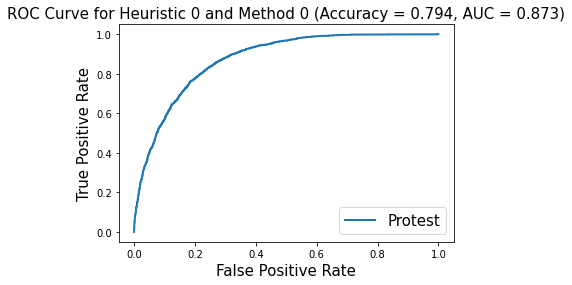

*** loading model from modelbest_1_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 336.61it/s]                                                      


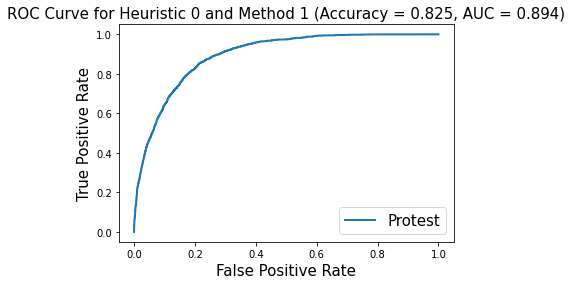

*** loading model from modelbest_2_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.64it/s]                                                      


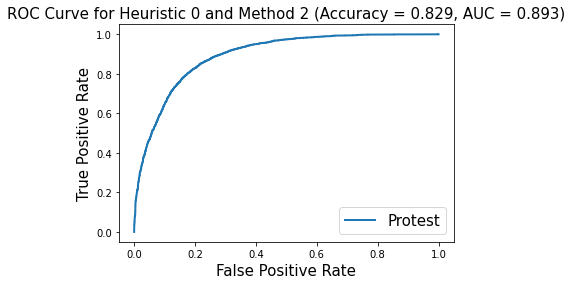

*** loading model from modelbest_3_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.05it/s]                                                      


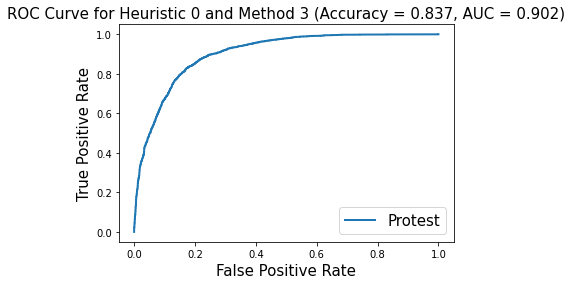

*** loading model from modelbest_4_0.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.45it/s]                                                      


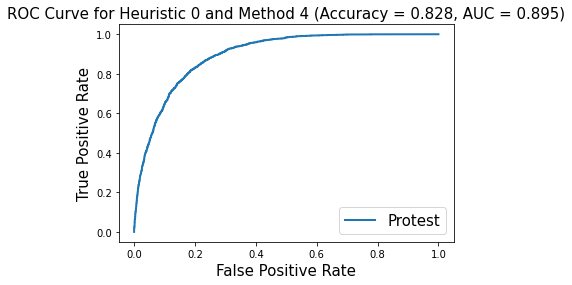

*** loading model from modelbest_0_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 337.89it/s]                                                      


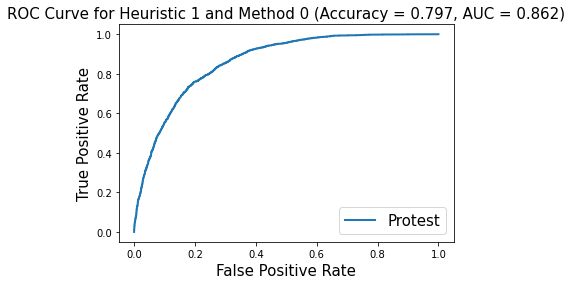

*** loading model from modelbest_1_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 337.54it/s]                                                      


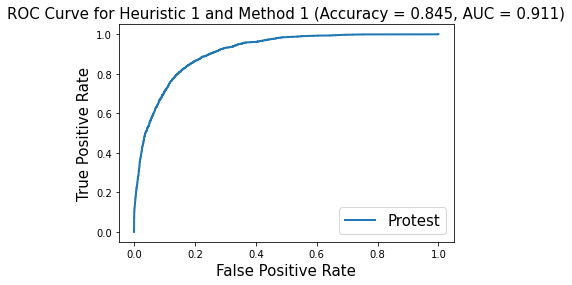

*** loading model from modelbest_2_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.06it/s]                                                      


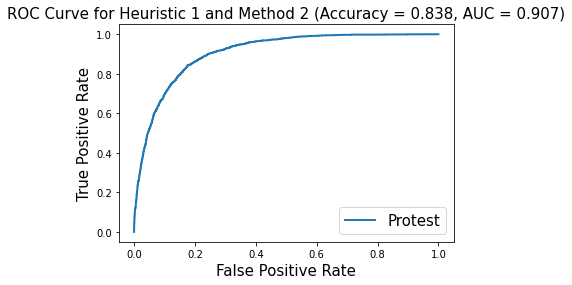

*** loading model from modelbest_3_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 334.44it/s]                                                      


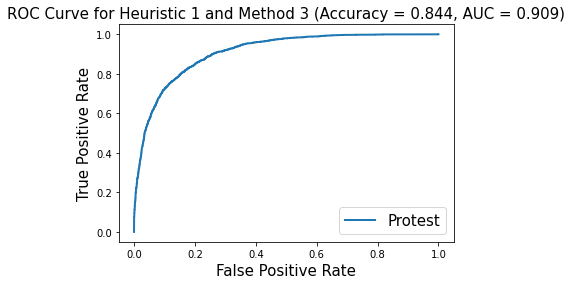

*** loading model from modelbest_4_1.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 339.82it/s]                                                      


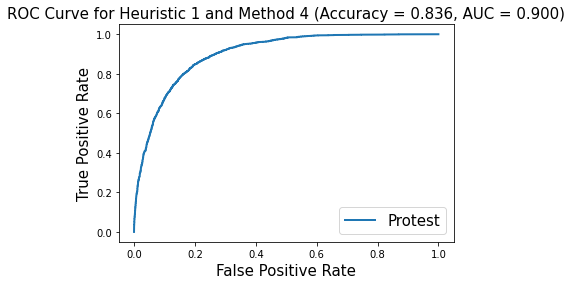

*** loading model from modelbest_0_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.11it/s]                                                      


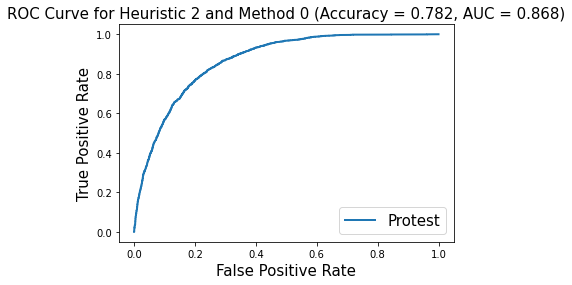

*** loading model from modelbest_1_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.54it/s]                                                      


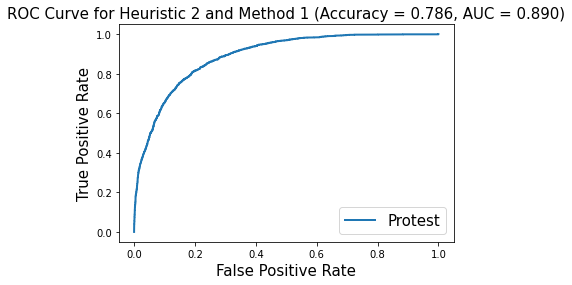

*** loading model from modelbest_2_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 336.91it/s]                                                      


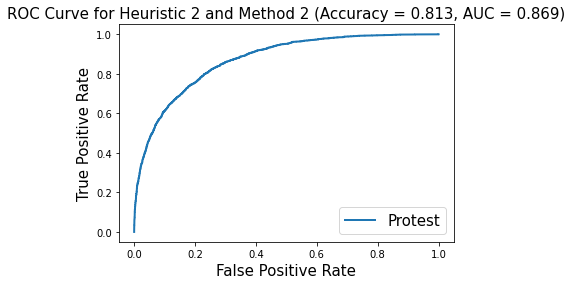

*** loading model from modelbest_3_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 333.30it/s]                                                      


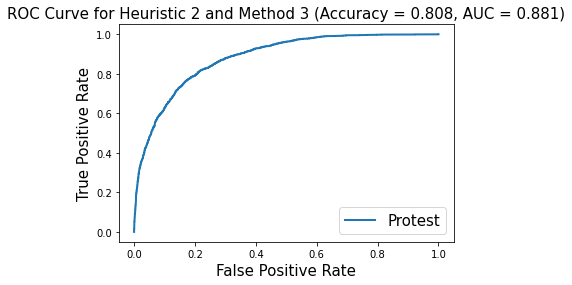

*** loading model from modelbest_4_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 338.05it/s]                                                      


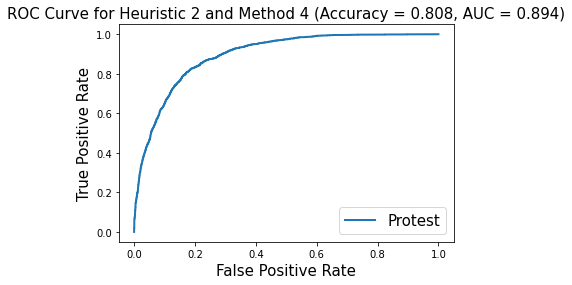

*** loading model from modelbest_0_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 334.77it/s]                                                      


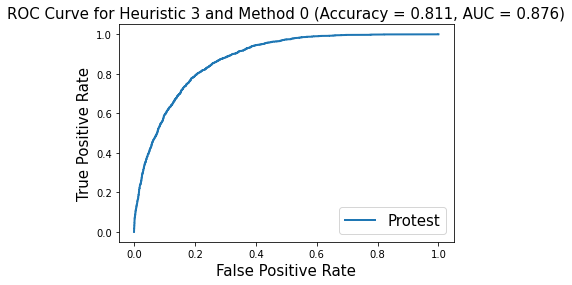

*** loading model from modelbest_1_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.53it/s]                                                      


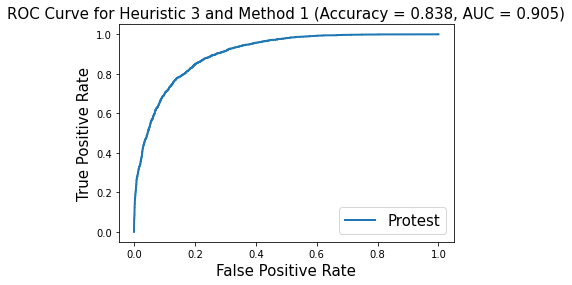

*** loading model from modelbest_2_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 337.31it/s]                                                      


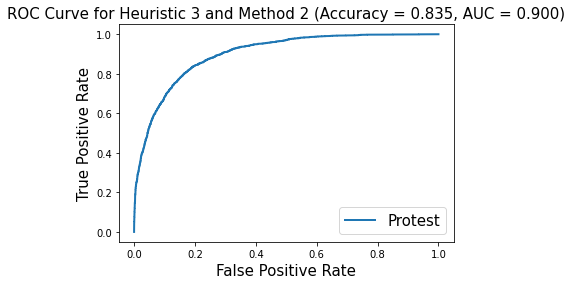

*** loading model from modelbest_3_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.59it/s]                                                      


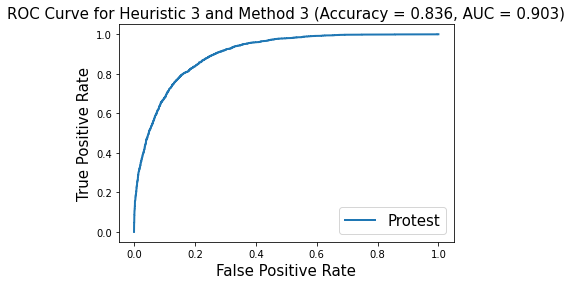

*** loading model from modelbest_4_3.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:24, 335.48it/s]                                                      


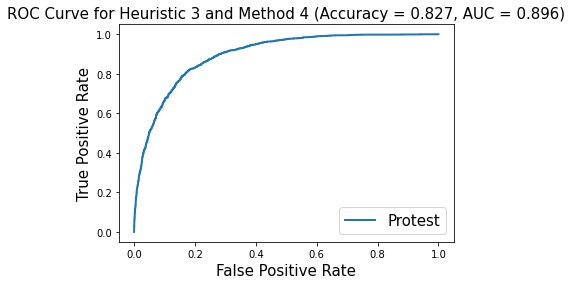

In [6]:
for i in range(4):
    for j in range(5):
        model_path = f'modelbest_{j}_{i}.pth.tar'
        # calculate outputs for the test data with our best model
        output_csv_path = 'pred.csv'
        command = ('python pred.py '
                   '--img_dir /UCLA-protest/img/test/ '
                   '--output_csvpath {csv_path} '
                   '--model {model} --batch_size 4 --cuda'
                   .format(csv_path = output_csv_path, model = model_path))


        !{command}

        # load prediction
        df_pred = pd.read_csv(output_csv_path)
        df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

        # load target
        test_label_path = '/UCLA-protest/annot_test.txt'
        df_target = pd.read_csv(test_label_path, delimiter= '\t')
        attr = "protest"
        target = df_target[attr]
        pred = df_pred[attr]
        fig = plot_roc(attr, target, pred, i, j)
        auc = roc_auc_score(target, pred)
        acc = accuracy_score(target, (pred >= 0.5).astype(int))
        auc_scores[i, j] = auc
        acc_scores[i, j] = acc

In [7]:
pd.DataFrame(auc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3', 'Method_4'])

Method_0  Method_1  Method_2  Method_3  Method_4
Heuristic_0  0.872856  0.893963  0.892657  0.901981  0.895422
Heuristic_1  0.861500  0.911249  0.906539  0.908655  0.900348
Heuristic_2  0.867548  0.890060  0.869449  0.881321  0.894302
Heuristic_3  0.876275  0.904760  0.899938  0.902661  0.895758

In [8]:
pd.DataFrame(auc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3', 'Method_4'])

Method_0  Method_1  Method_2  Method_3  Method_4
Heuristic_0  0.872856  0.893963  0.892657  0.901981  0.895422
Heuristic_1  0.861500  0.911249  0.906539  0.908655  0.900348
Heuristic_2  0.867548  0.890060  0.869449  0.881321  0.894302
Heuristic_3  0.876275  0.904760  0.899938  0.902661  0.895758

In [9]:
pd.DataFrame(acc_scores, index =['Heuristic_0', 'Heuristic_1', 'Heuristic_2', 'Heuristic_3'], 
            columns = ['Method_0', 'Method_1', 'Method_2', 'Method_3', 'Method_4'])

Method_0  Method_1  Method_2  Method_3  Method_4
Heuristic_0  0.794309  0.825463  0.828775  0.836993  0.828284
Heuristic_1  0.797375  0.844842  0.837606  0.843739  0.835521
Heuristic_2  0.782289  0.785600  0.813075  0.807678  0.808414
Heuristic_3  0.811235  0.837606  0.834785  0.836134  0.826690

In [8]:
model_path = 'modelbest_1_2.pth.tar'
# calculate outputs for the test data with our best model
output_csv_path = 'pred.csv'
command = ('python pred.py '
           '--img_dir /UCLA-protest/img/test/ '
           '--output_csvpath {csv_path} '
           '--model {model} --batch_size 4 --cuda'
           .format(csv_path = output_csv_path, model = model_path))

            
!{command}

# load prediction
df_pred = pd.read_csv(output_csv_path)
df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

# load target
test_label_path = '/UCLA-protest/annot_test.txt'
df_target = pd.read_csv(test_label_path, delimiter= '\t')

*** loading model from modelbest_1_2.pth.tar
*** calculating the model output of the images in /UCLA-protest/img/test/
  0%|                                                  | 0/8153 [00:00<?, ?it/s]/ext3/conda/bootcamp/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
8156it [00:27, 301.47it/s]                                                      


In [7]:
#python pred.py --img_dir /UCLA-protest/img/test/ --output_csvpath pred.csv --model model_best.pth.tar --batch_size 4 --cuda
torch.load('modelbest_2_2.pth.tar')

{'epoch': 125,
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 1.4835e-02,  1.5322e-02, -1.5000e-02,  ..., -4.0598e-02,
                          -4.2850e-02, -7.0115e-02],
                         [ 4.9964e-03,  6.2835e-03,  1.5409e-02,  ...,  2.4640e-03,
                          -2.0846e-02, -3.8135e-02],
                         [ 2.3462e-02,  2.4313e-02,  1.6711e-02,  ...,  1.0333e-01,
                           6.2703e-02,  5.2612e-02],
                         ...,
                         [ 1.2722e-03,  2.9218e-02, -8.7822e-03,  ..., -1.2638e-01,
                          -7.6547e-02,  8.1309e-03],
                         [ 5.6003e-03,  4.9355e-02,  6.3294e-02,  ...,  2.4893e-02,
                          -3.3869e-02, -1.5672e-02],
                         [-7.8150e-02, -3.0570e-02, -1.6797e-02,  ...,  3.5997e-02,
                           2.2178e-02,  1.1303e-03]],
               
                        [[-1.6690e-02,  1.2320e-02,  2.4721e-02,  ..., 

#### Binary Variables

In [4]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for {attr} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(attr = attr.title(), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

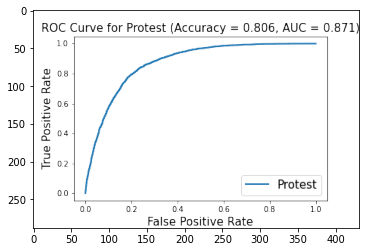

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/home/ac8839/1006_Capstone_Project/src/won-et-al/files/protest.png', 'r')
imshow(np.asarray(pil_im))

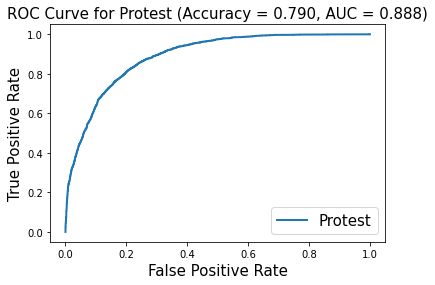

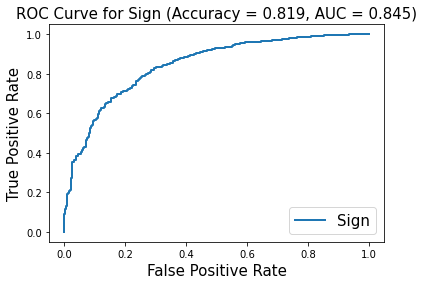

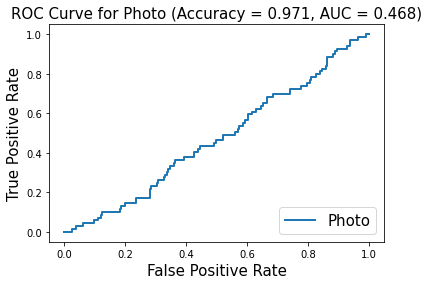

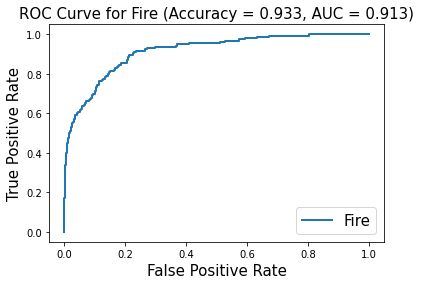

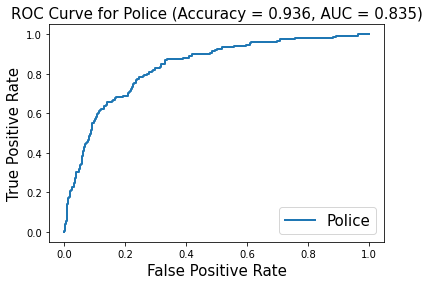

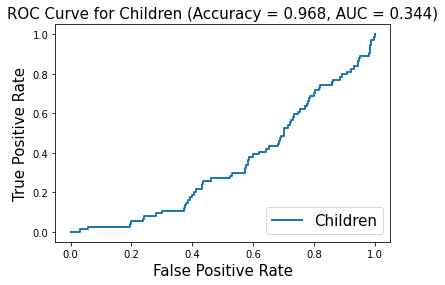

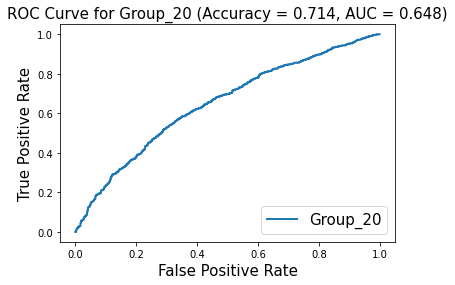

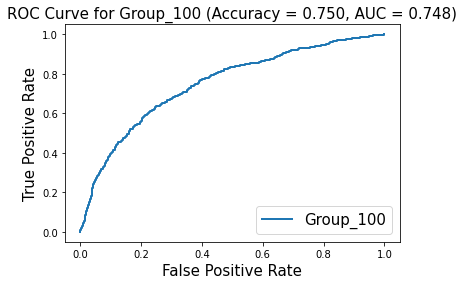

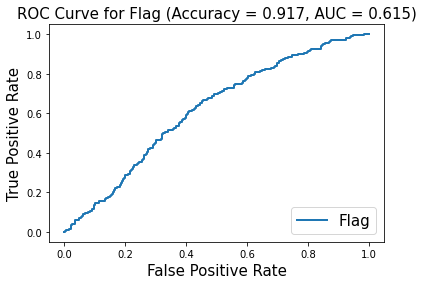

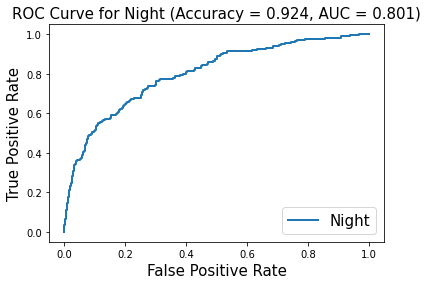

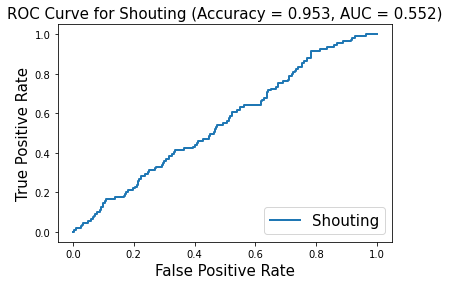

In [9]:
#Method 1
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

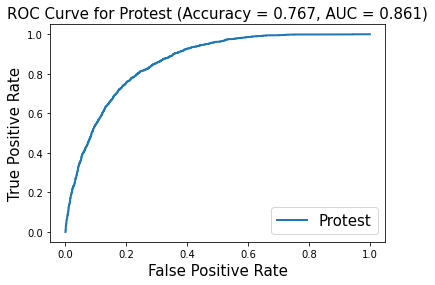

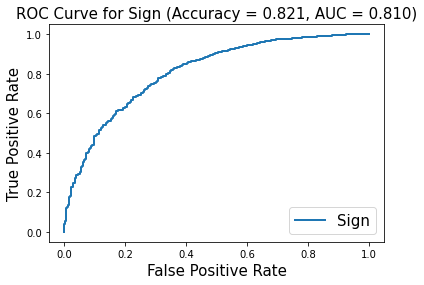

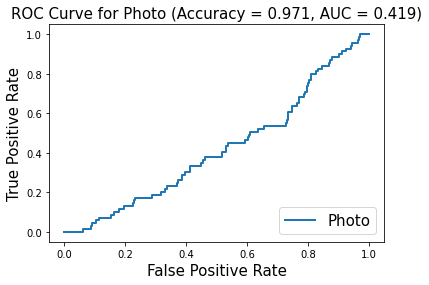

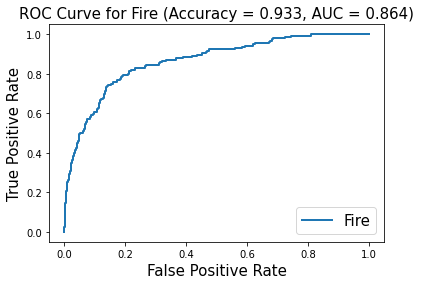

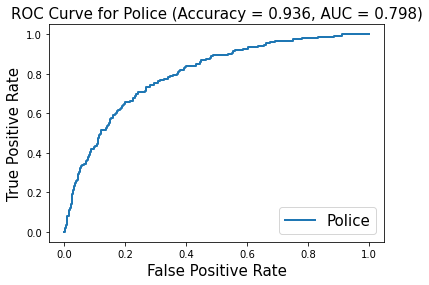

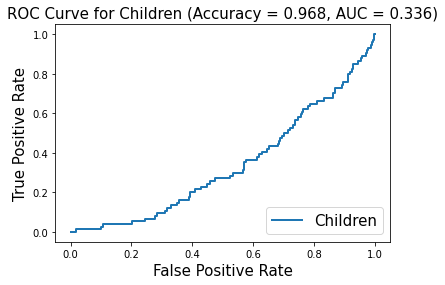

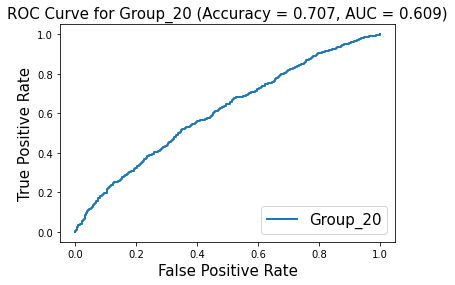

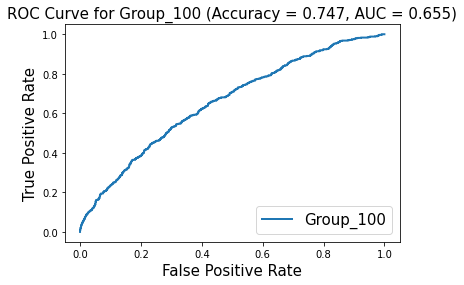

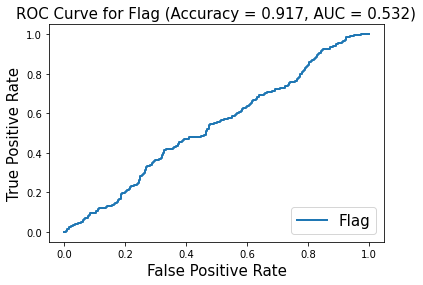

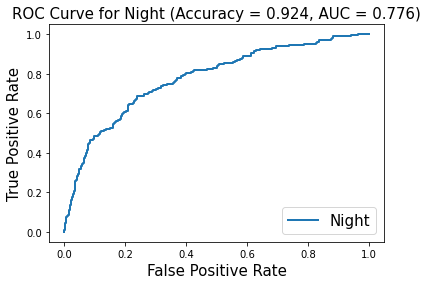

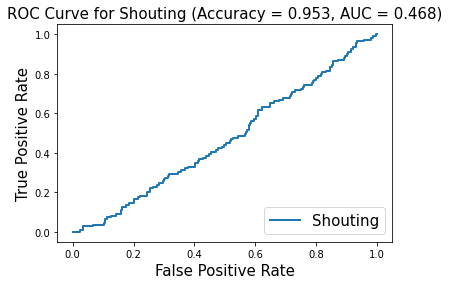

In [5]:
#Method 0
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

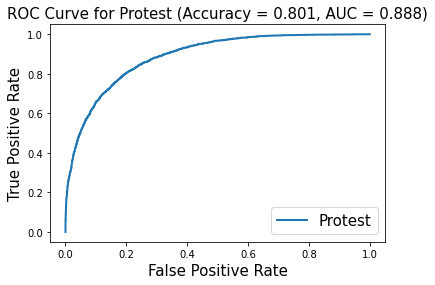

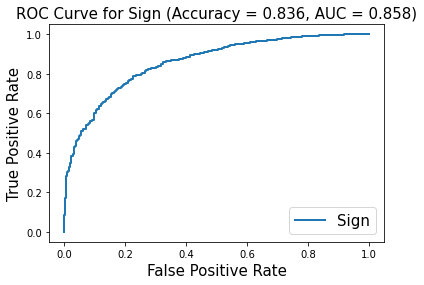

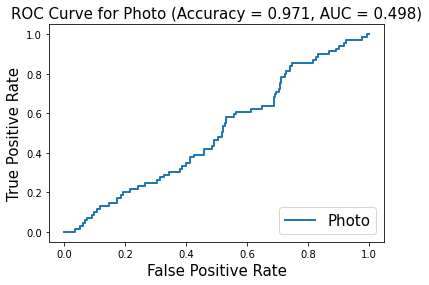

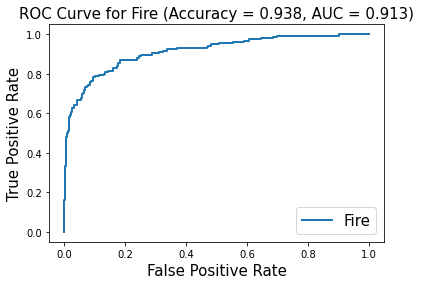

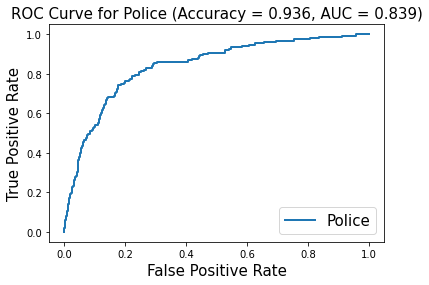

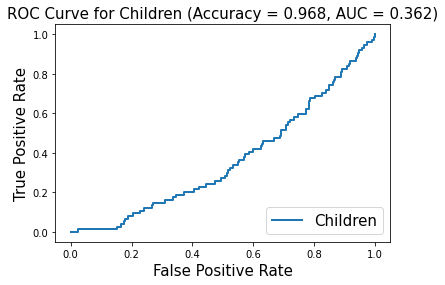

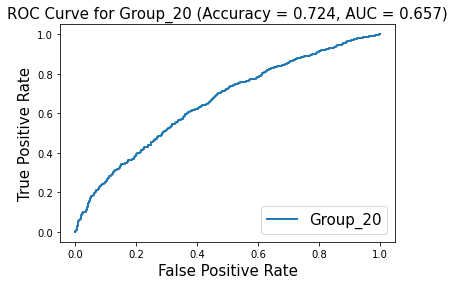

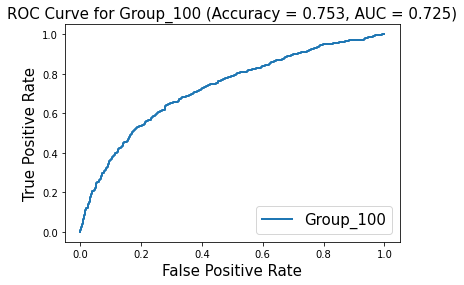

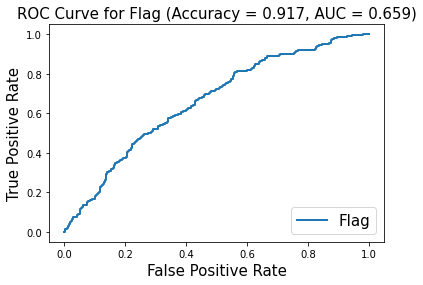

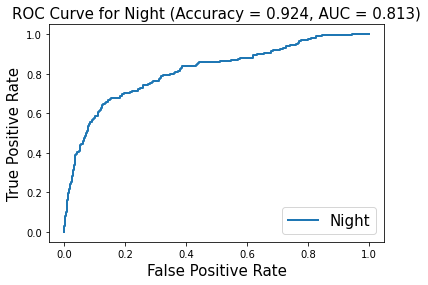

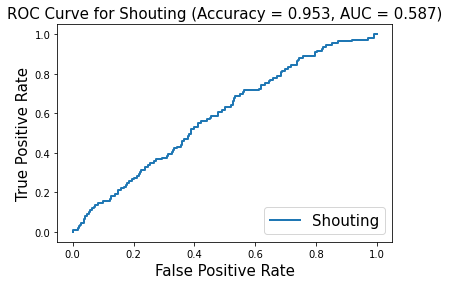

In [20]:
#Method 3
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

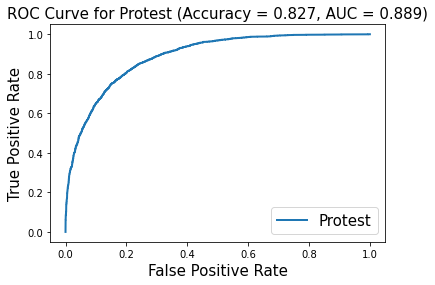

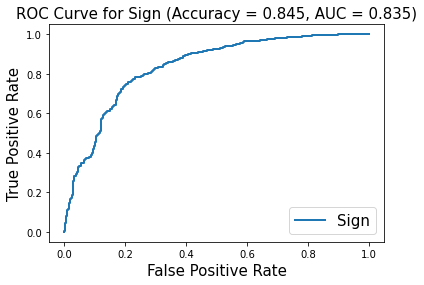

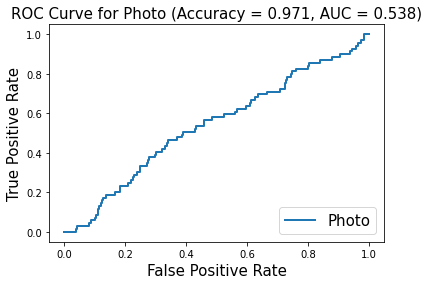

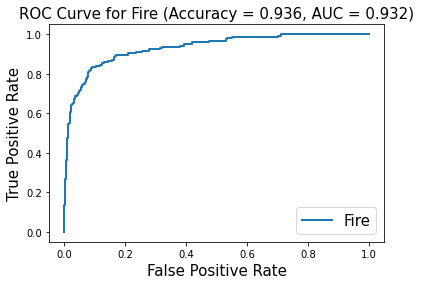

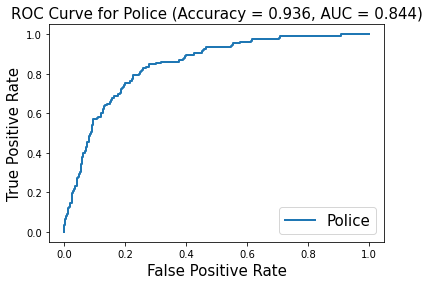

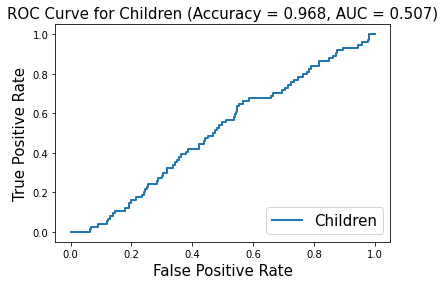

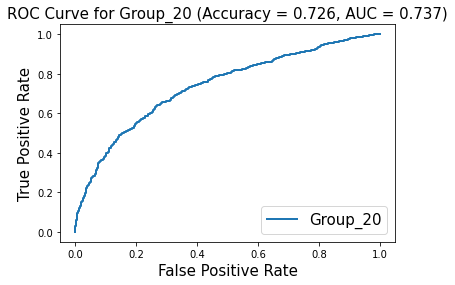

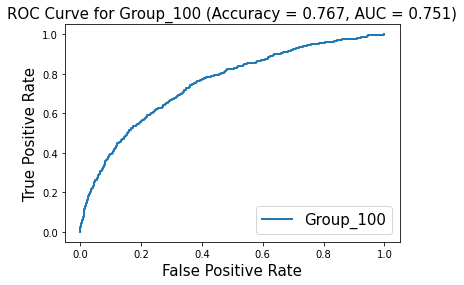

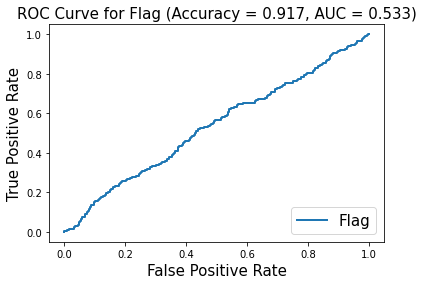

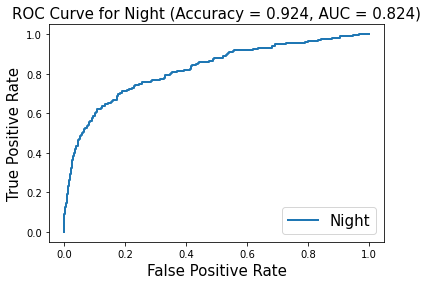

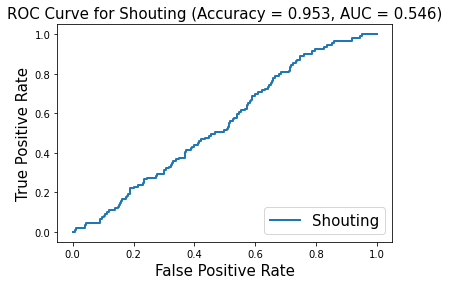

In [10]:
#Method 2
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    #fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

#### Violence

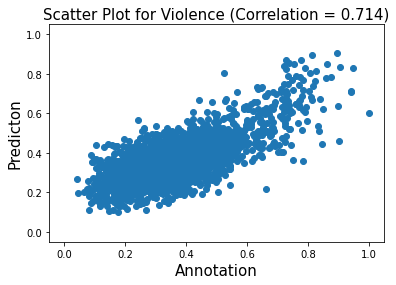

In [11]:
import scipy.stats as stats
attr = 'violence'
pred = df_pred[df_target['protest'] == 1][attr].tolist()
target = df_target[df_target['protest'] == 1][attr].astype(float).tolist()
fig, ax = plt.subplots()
plt.scatter(target, pred, label = attr.title())
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(target, pred)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = attr.title(), corr= corr)), fontsize = 15)
plt.show()
#fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))